In [1]:
# hw_one_week 2023.03.02. (Thur)
# Data, labels 열 개만 출력해서 실제 값을 확인하세요.
# (랜덤한 10가지의 data와 lables 출력)

from sklearn.datasets import load_breast_cancer
import pandas as pd

breast_cancer_data = load_breast_cancer()

df_data = pd.DataFrame(breast_cancer_data.data)
df_labels = pd.DataFrame(breast_cancer_data.target)

In [2]:
# Data | labels
df_data.sample(n = 10)
df_labels.sample(n = 10)

,0
113,1
453,1
194,0
274,0
5,0
106,1
489,0
235,1
153,1
267,1


In [4]:
# .columns 속성을 이용하여 데이터 df의 컬럼명을 모두 출력함.
df_labels.columns

RangeIndex(start=0, stop=1, step=1)

In [5]:
# .head() 함수를 이용하여 상위 5행을 출력
df_labels.head()

,0
0,0
1,0
2,0
3,0
4,0


In [6]:
# malignant = 0, benign = 1
print(breast_cancer_data.target_names)

['malignant' 'benign']


In [7]:
# X_train, y_train, X_test, y_test로 훈련과 테스트 데이터를 8:2로 나누기
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.2, random_state=6)

print("X_train.shape :", X_train.shape)

print("y_train.shape :", y_train.shape)

print("X_test.shape :", X_test.shape)

print("y_test.shape :", y_test.shape)

X_train.shape : (455, 30)
y_train.shape : (455, 1)
X_test.shape : (114, 30)
y_test.shape : (114, 1)


In [14]:
# https://soranhan.tistory.com/21

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [15]:
from sklearn.neighbors import KNeighborsClassifier

mymodel = KNeighborsClassifier(n_neighbors=3)
mymodel.fit(X_train, y_train.values.ravel())

# 예측
prediction = mymodel.predict(X_test)

print(mymodel.score(X_test, y_test))

0.9385964912280702


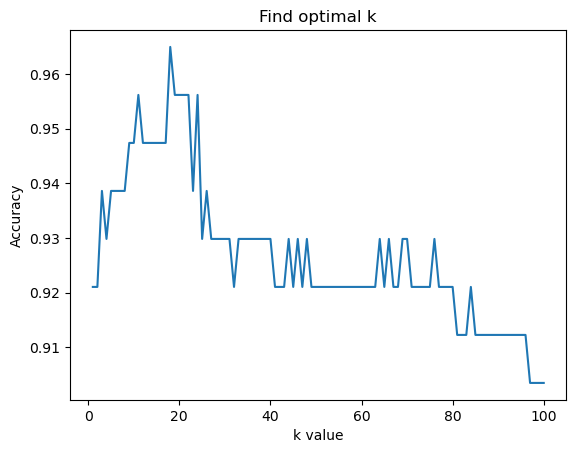

In [17]:
# Accuracy 증가시키기(최적의 k 값 찾기)
import matplotlib.pyplot as plt

k_range = range(1, 101)
find_optimal_k = []

for k in k_range:
    find_k = KNeighborsClassifier(n_neighbors=k)
    find_k.fit(X_train, y_train.values.ravel())
    find_optimal_k.append(find_k.score(X_test, y_test))

plt.plot(k_range, find_optimal_k, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find optimal k")
plt.show()

In [26]:
"""
# 검증(DataConversionWarning으로 너무 더러워 져서 코드는 잘 작동합니다.)

from sklearn import metrics
import numpy as np
Ks = 100
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1, Ks):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)

print(mean_acc)
"""

'\n# 검증(DataConversionWarning으로 너무 더러워 져서 코드는 잘 작동합니다.)\n\nfrom sklearn import metrics\nimport numpy as np\nKs = 100\nmean_acc = np.zeros((Ks - 1))\nstd_acc = np.zeros((Ks - 1))\n\nfor n in range(1, Ks):\n    clf = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)\n    yhat = clf.predict(X_test)\n    mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)\n\nprint(mean_acc)\n'

In [27]:
# 데이터 전처리 (min-max-normalization)
X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.2, random_state=6)

In [28]:
# min-max-normalization
min_X_train = X_train.min(axis=0)
max_X_train = X_train.max(axis=0)
scaled_X_train = (X_train - min_X_train) / (max_X_train - min_X_train)

print(scaled_X_train.shape)

(455, 30)


In [29]:
min_X_test = X_test.min(axis=0)
max_X_test = X_test.max(axis=0)
scaled_X_test = (X_test - min_X_test) / (max_X_test - min_X_test)

print(scaled_X_test.shape)

(114, 30)


In [30]:
# 데이터 전처리 이후 도출된 정확도
scaled_model = KNeighborsClassifier(n_neighbors=3)
scaled_model.fit(scaled_X_train, y_train.values.ravel())
prediction = scaled_model.predict(scaled_X_test)

scaled_accuracy = scaled_model.score(scaled_X_test, y_test)

print(scaled_accuracy)

0.9122807017543859


In [31]:
# 데이터의 전처리(z-score-normalization)
# 평균, 표준편차 계산

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

In [32]:
# z-score-normalization
z_scaled_X_train = (X_train - mean) / std
z_scaled_X_test = (X_test - mean) / std

In [33]:
# 데이터의 전처리 이후 도출된 정확도
z_scaled_model = KNeighborsClassifier(n_neighbors=3)
z_scaled_model.fit(z_scaled_X_train, y_train.values.ravel())
prediction = z_scaled_model.predict(z_scaled_X_test)

z_scaled_accuracy = z_scaled_model.score(z_scaled_X_test, y_test)

print(z_scaled_accuracy)

0.9649122807017544
